In [2]:
import matplotlib.pyplot as plt
import numpy

#### VARIABILE ALEATORIA BERNULLIANA
E' una distribuzione di probabilità su soli due valori chiamati ```0``` e ```1```  .  
Una distribuzione Bernulliana è parametrizzata rispetto ad un parametro ```p```  .  
```p``` indica la probabilità di successo, ovvero se ```X ~ B(p)``` allora ```P(X=1) = p```  .  
Dove con la notazione ```X ~ B(p)``` diciamo che ```X``` è estratto da una distribuzione Bernulliana di parametro ```p```  .   
Spesso, la bernulliana è associata al lancio di una moneta potenzialemente truccata, dove ```P(X=testa)=p```.

In [3]:
# questa funzione ci ritornerà delle variabili aleatorie        ###
# estratte secondo la distribuzione di bernulli con parametro p ###
def get_bernulli_random_variable(p=0.5):
    def random_variable():
        return 1 if numpy.random.random()<p else 0
    return random_variable

# costruiamo una variabile aleatoria corrispondente a una moneta "fair" ###
f0 = get_bernulli_random_variable(0.5)

# facciamo un po' di test ###
for i in range(10):
    print(f0(), end=" ")
print()

1 1 1 0 1 1 1 0 1 0 


Se facciamo abbastanza esperimenti dovremmo notare che la distribuzione dei nostri lanci converge a quella teorica  .  
Questo vuol dire che anche varianza e media degli esperimenti convergeranno al valore atteso e alla varianza della distribuzione teorica.

In [4]:
# verifichiamo che il valore atteso di una bernulliana di parametro p è proprio p ###
# e che la varianza è p(1-p)                                                      ###

p = 0.75
theoretical_mean = p
theoretical_variance = p*(1-p)

f0 = get_bernulli_random_variable(p=0.75)
# facciamo un milione di test ###
tests = [f0() for i in range(10**2)]

print("the computed mean is       :",numpy.mean(tests))
print("the theoretical mean is    :",theoretical_mean)
print("the computed variance is   :",numpy.var(tests))
print("the theoretical variance is:",theoretical_variance)

the computed mean is       : 0.72
the theoretical mean is    : 0.75
the computed variance is   : 0.20159999999999997
the theoretical variance is: 0.1875


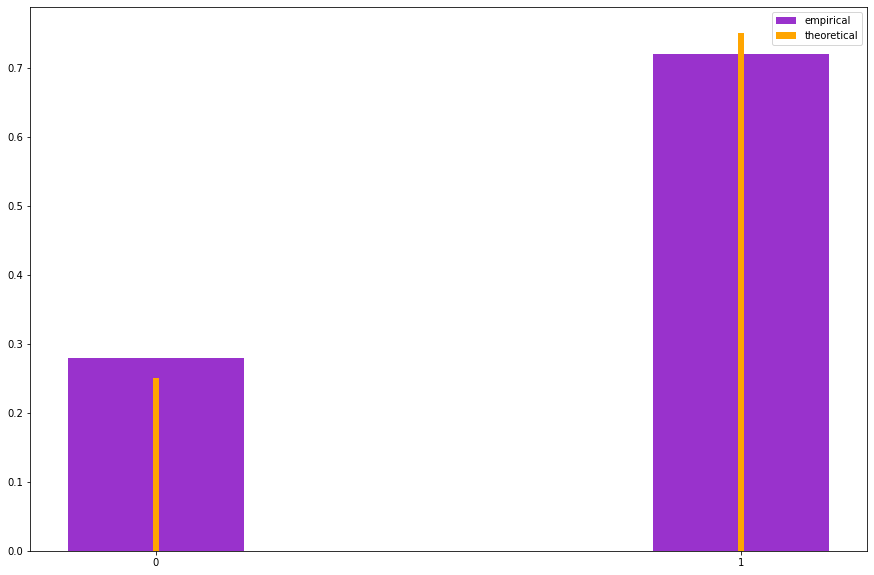

In [5]:
### plottiamo anche un istogramma ###
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(tests, bins=[0,1,2], density=True, align="left", color="darkorchid", rwidth=0.3)
ax.bar([0,1],[1-p,p], align="center", color="orange", width=0.01)
ax.set_xticklabels([0,1])
ax.set_xticks([0,1])
ax.legend(("empirical", "theoretical"))
del tests

### VARIABILE ALEATORIA BINOMIALE
E' la variabile aleatoria che descrive il numero di successi di un processo di Bernulli. 

<a href="https://www.codecogs.com/eqnedit.php?latex=S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" title="S = X_1 + X_2 + \dots + X_n \text{ where } X_i \sim \mathcal{B}(p))" /></a>

Di conseguenza, possiamo costruire la nostra variabile aleatoria Binomiale sfruttando le Bernulliane che abbiamo costruito in precedenza.  
Diremo:

<a href="https://www.codecogs.com/eqnedit.php?latex=X&space;\sim&space;\mathcal{B}(n,p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?X&space;\sim&space;\mathcal{B}(n,p))" title="X \sim \mathcal{B}(n,p))" /></a>

Per denotare che X è estratta da una variabile aleatoria Binomiale caratterizzata da i parametri n e p.

In [6]:
# la distribuzione binomiale B(n,p) somma n variabili aleatorie indipendenti ###
def get_binomial_random_variable(n=5,p=0.5):
    # costruiamo n bernulliane di parametro p
    rvs = [get_bernulli_random_variable(p) for i in range(n)]
    def random_variable():
        return sum([rv() for rv in rvs])
    return random_variable

f0 = get_binomial_random_variable(n=5,p=0.5)

# facciamo un po' di test ###
for i in range(10):
    print(f0(), end=" ")

2 4 5 2 4 4 4 1 3 0 

Ancora una volta possiamo verificare che con l'aumentare del numero di tentativi la distribuzione ottenuta converge a quella teorica.

In [7]:
# verifichiamo che il valore atteso di una binomiale di parametro n,p è n*p ###
# e che la varianza è n*p*(1-p)                                             ###

p = 0.75
n = 10
theoretical_mean = n*p
theoretical_variance = n*p*(1-p)

f0 = get_binomial_random_variable(n=n,p=p)

# facciamo un milione di test ###
tests = [f0() for i in range(10**2)]

print("the computed mean is       :",numpy.mean(tests))
print("the theoretical mean is    :",theoretical_mean)
print("the computed variance is   :",numpy.var(tests))
print("the theoretical variance is:",theoretical_variance)

the computed mean is       : 7.29
the theoretical mean is    : 7.5
the computed variance is   : 2.0259000000000005
the theoretical variance is: 1.875


In [8]:
# costruiamo la distribuzione binomiale teorica ###

# ci serve la funzione fattoriale ###
def factorial(n):
    assert n >= 0
    return 1 if n < 2 else n*factorial(n-1)

# usando il fattoriale possiamo calcolare il coefficiente binomiale ###
def binomial_coeff(n,k):
    assert n >= k and n >= 0 and k >= 0
    return factorial(n)//(factorial(k)*factorial(n-k))
     
# usando il coefficiente binomiale possiamo calcolare la distribuzione binomiale ###
def binomial_dist(n,p):
    assert p >= 0 and p <= 1 and n >= 0
    return [binomial_coeff(n,k)*(p**k)*(1-p)**(n-k) for k in range(n+1)]

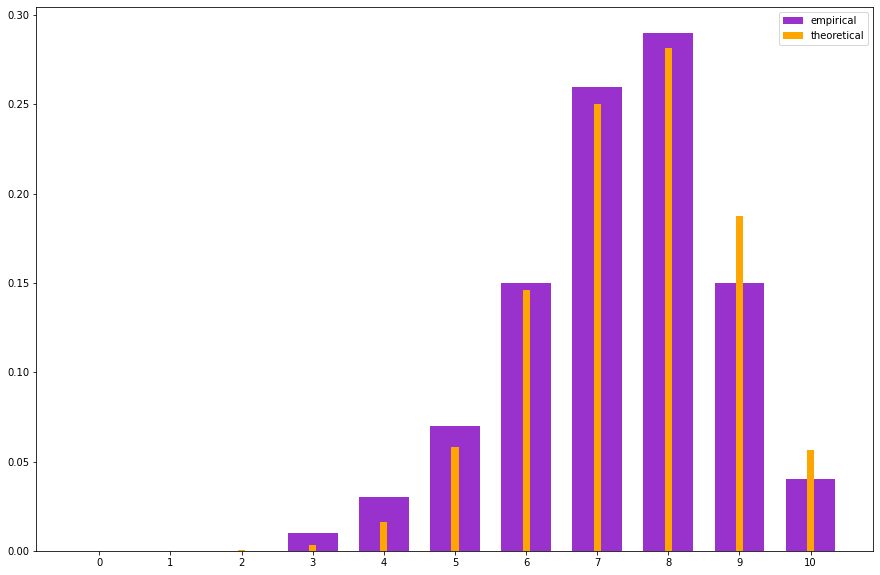

In [9]:
# ancora una volta, facciamo il plot dell'istogramma ###
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=0.7)
ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", width=0.1)
ax.set_xticklabels(range(n+1))
ax.set_xticks(range(n+1))
ax.legend(("empirical", "theoretical"))
del tests

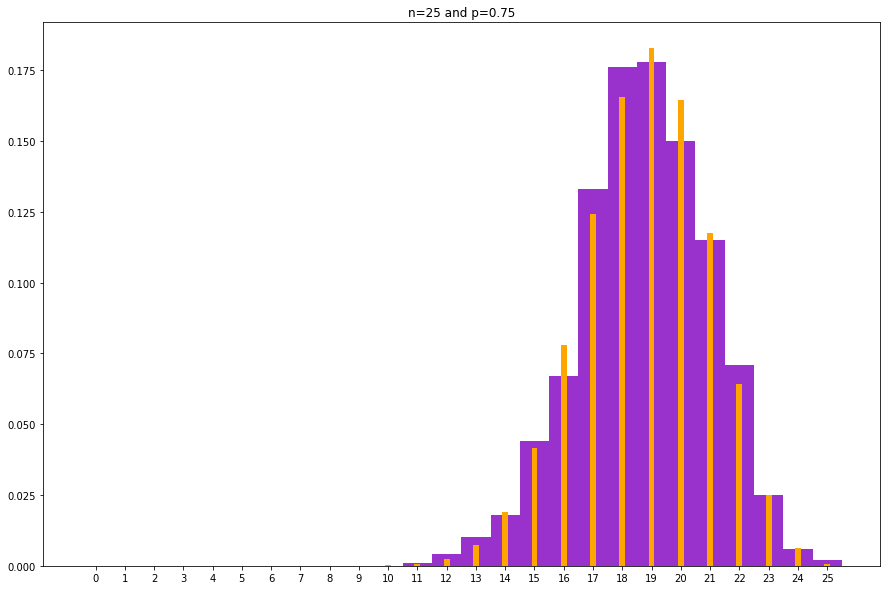

In [10]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###

def plot_binomial(n=5,p=0.5,steps=10**5):
    rv = get_binomial_random_variable(n=n,p=p)
    tests = [rv() for i in range(steps)]
    fig, ax = plt.subplots(figsize=(15,10))
    ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=1, zorder=0)
    ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", zorder=1, width=0.2)
    ax.set_xticklabels(range(n+1))
    ax.set_xticks(range(n+1))
    ax.set_title("n={} and p={}".format(n,p))
    del tests, fig, ax

plot_binomial(n=25,p=0.75,steps=1000)

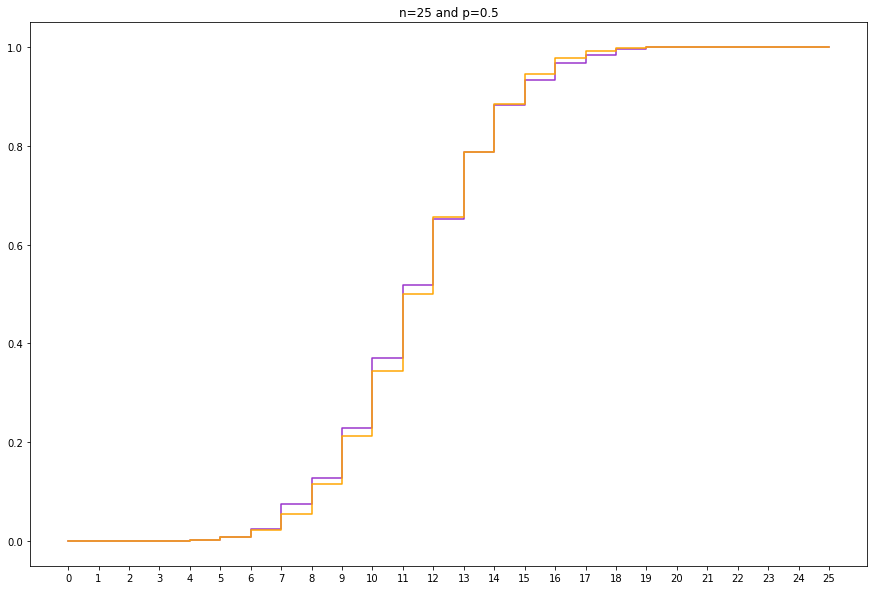

In [11]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###
# questa volta con la cumulata                                ###

def plot_binomial(n=5,p=0.5,steps=10**5):
    rv = get_binomial_random_variable(n=n,p=p)
    tests = [rv() for i in range(steps)]
    fig, ax = plt.subplots(figsize=(15,10))
    
    quantiles = numpy.cumsum([tests.count(i) for i in range(n+1)])/len(tests)
    theoretical_quantiles = numpy.cumsum(binomial_dist(n,p))
    
    ax.step(range(n+1), quantiles, color="darkorchid", zorder=0)
    ax.step(range(n+1), theoretical_quantiles, color="orange", zorder=1)
    ax.set_xticklabels(range(n+1))
    ax.set_xticks(range(n+1))
    ax.set_title("n={} and p={}".format(n,p))
    del tests, fig, ax

plot_binomial(n=25,p=0.5,steps=1000)

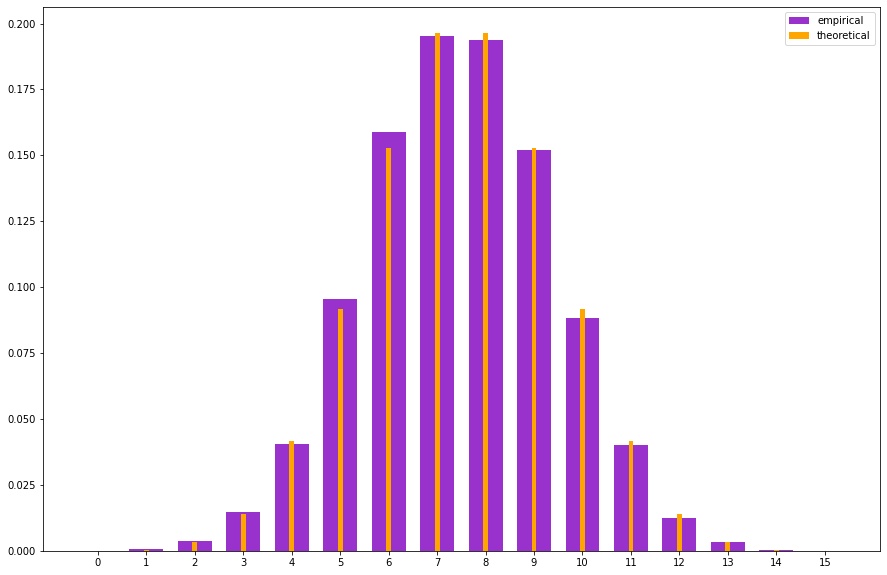

In [12]:
# numpy ha il suo interno gìà la binomiale ###

n=15
p=0.5

tests = [numpy.random.binomial(n,p) for i in range(10**4)]

fig, ax = plt.subplots(figsize=(15,10))
ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=0.7)
ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", width=0.1)
ax.set_xticklabels(range(n+1))
ax.set_xticks(range(n+1))
ax.legend(("empirical", "theoretical"))
del tests

In ultimo vediamo cosa succede al qqplot di una binomiale rispetto ad una normale.  
Nella seguente simulazione vengono fatte 10000 campionamenti dalla nostra binomiale prima con ```n=10``` poi ```n=25``` a seguire ```n=50``` e infine ```n=100```  .  
cosa accadra per n che tende a infinito?

Text(0.5, 1.0, 'n=100 and p=0.5')

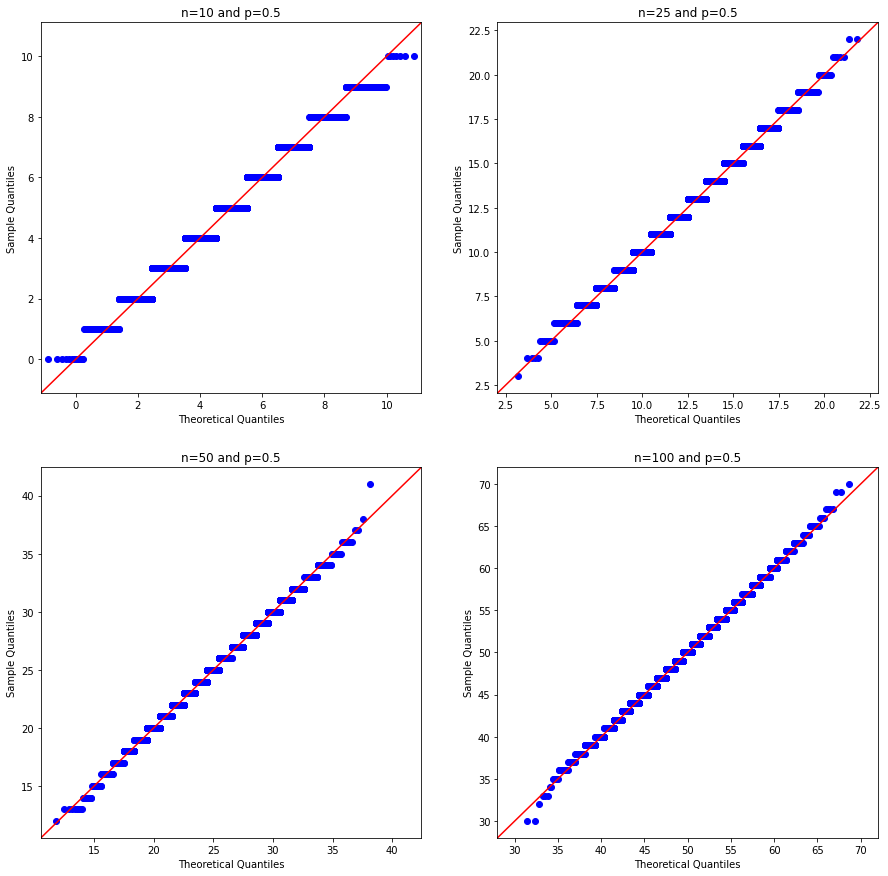

In [13]:
import statsmodels.api as sm
import scipy.stats as stats

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,15)

n, p, t = 10, 0.5, 10**4
tests = numpy.random.binomial(n, p, t)
plot = sm.qqplot(tests, dist=stats.distributions.norm(n*p,(n*p*(1-p))**0.5), line='45', ax=ax[0][0])
ax[0][0].set_title("n={} and p={}".format(10,0.5))

n, p, t = 25, 0.5, 10**4
tests = numpy.random.binomial(n, p, t)
plot = sm.qqplot(tests, dist=stats.distributions.norm(n*p,(n*p*(1-p))**0.5), line='45', ax=ax[0][1])
ax[0][1].set_title("n={} and p={}".format(25,0.5))

n, p, t = 50, 0.5, 10**4
tests = numpy.random.binomial(n, p, t)
plot = sm.qqplot(tests, dist=stats.distributions.norm(n*p,(n*p*(1-p))**0.5), line='45', ax=ax[1][0])
ax[1][0].set_title("n={} and p={}".format(50,0.5))

n, p, t = 100, 0.5, 10**4
tests = numpy.random.binomial(n, p, t)
plot = sm.qqplot(tests, dist=stats.distributions.norm(n*p,(n*p*(1-p))**0.5), line='45', ax=ax[1][1])
ax[1][1].set_title("n={} and p={}".format(100,0.5))



In [14]:
# lets use the sliders ###

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_binomial(n=5,p=0.5,steps=10**5):
    rv = get_binomial_random_variable(n=n,p=p)
    tests = [rv() for i in range(steps)]
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    
    quantiles = numpy.cumsum([tests.count(i) for i in range(n+1)])/len(tests)
    theoretical_quantiles = numpy.cumsum(binomial_dist(n,p))
    
    ax[0].step(range(n+1), quantiles, color="darkorchid", zorder=0)
    ax[0].step(range(n+1), theoretical_quantiles, color="orange", zorder=1)
    ax[0].set_title("n={} and p={}".format(n,p))

    ax[1].hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=1, zorder=0)
    ax[1].bar(range(n+1), binomial_dist(n,p), align="center", color="orange", zorder=1, width=0.2)
    ax[1].set_title("n={} and p={}".format(n,p))

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    plot = sm.qqplot(numpy.array(tests), dist=stats.distributions.norm(n*p,(n*p*(1-p))**0.5), line='45', ax=ax)
    ax.set_title("n={} and p={}".format(100,0.5))
    
interact(plot_binomial, n=widgets.IntSlider  (min=0, max=1000 , step=1   , value=10,  layout={'width': '1000px'}),
                        p=widgets.FloatSlider(min=0, max=1    , step=0.01, value=0.5, layout={'width': '1000px'}),
                    steps=widgets.IntSlider  (min=1, max=10000, step=1   , value=100, layout={'width': '1000px'}));

interactive(children=(IntSlider(value=10, description='n', layout=Layout(width='1000px'), max=1000), FloatSlid…